In [1]:
# Import packages and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Load the dataset
cytochrome = pd.read_csv('cytochrome.csv', header=None, usecols=range(1, 14))
cytochrome

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1,12,10,11,10,9,10,13,14,11,15,18
1,1,0,11,9,10,9,8,11,12,13,10,14,17
2,12,11,0,3,6,5,6,7,11,13,10,11,14
3,10,9,3,0,3,2,4,6,9,11,8,9,11
4,11,10,6,3,0,3,5,7,10,11,8,9,12
5,10,9,5,2,3,0,2,6,9,10,7,8,11
6,9,8,6,4,5,2,0,6,8,9,6,9,11
7,10,11,7,6,7,6,6,0,12,11,10,11,13
8,13,12,11,9,10,9,8,12,0,3,3,8,11
9,14,13,13,11,11,10,9,11,3,0,4,9,13


In [2]:
# Add labels for each species and save as a data frame
species = [
    "Human",
    "Monkey",
    "Horse",
    "Cow",
    "Dog",
    "Whale",
    "Rabbit",
    "Kangaroo",
    "Chicken",
    "Penguin",
    "Duck",
    "Turtle",
    "Frog",
]

pd.DataFrame(data=cytochrome.to_numpy(), index=species, columns=species)

,Human,Monkey,Horse,Cow,Dog,Whale,Rabbit,Kangaroo,Chicken,Penguin,Duck,Turtle,Frog
Human,0,1,12,10,11,10,9,10,13,14,11,15,18
Monkey,1,0,11,9,10,9,8,11,12,13,10,14,17
Horse,12,11,0,3,6,5,6,7,11,13,10,11,14
Cow,10,9,3,0,3,2,4,6,9,11,8,9,11
Dog,11,10,6,3,0,3,5,7,10,11,8,9,12
Whale,10,9,5,2,3,0,2,6,9,10,7,8,11
Rabbit,9,8,6,4,5,2,0,6,8,9,6,9,11
Kangaroo,10,11,7,6,7,6,6,0,12,11,10,11,13
Chicken,13,12,11,9,10,9,8,12,0,3,3,8,11
Penguin,14,13,13,11,11,10,9,11,3,0,4,9,13


In [3]:
# Format the data as a distance matrix
# In this case, the data already represents distance between points (species)
differences = squareform(cytochrome)

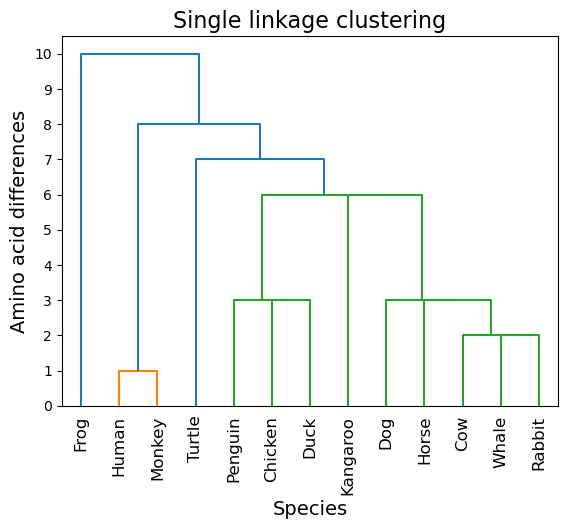

In [4]:
# Define a clustering model with single linkage
clusterModel = linkage(differences, method='single')

# Create the dendrogram
dendrogram(clusterModel, labels=species, leaf_rotation=90)

# Plot the dendrogram
plt.ylabel('Amino acid differences', fontsize=14)
plt.yticks(np.arange(0, 11, step=1))
plt.xlabel('Species', fontsize=14)
plt.title('Single linkage clustering', fontsize=16)
plt.show()